# **Introduction**

India has some of the highest levels of air pollution in the world, with several cities frequently ranking among the most polluted cities. According to the World Air Quality Report 2020 by IQAir, 22 out of the top 30 most polluted cities globally were in India. 

Vehicular emissions, industrial emissions, construction dust, crop residue burning, and solid waste burning are major sources of air pollution in India.

According to a study published in The Lancet Planetary Health in 2017, outdoor air pollution was responsible for *over 1.2 million premature deaths in India in 2015*, with respiratory diseases being one of the major causes. (The Lancet Planetary Health (2017). The Lancet Commission on pollution and health. Retrieved from: https://www.thelancet.com/commissions/pollution-and-health)

The Indian government has taken steps to address air pollution, such as implementing stricter emission norms, promoting clean energy sources, and banning certain practices. However, enforcement and implementation remain challenging, which is a common issue in many countries globally.

A comparative analysis of various states in India can give us useful insight into governmental policies and their implementations. 


In [36]:
library(tidyverse)
library(ggplot2)

# **Data cleaning and Random Purposive Sampling**

**Source of data**

Importing Indian Air Quality Data from [kaggle](https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data)

In [37]:
data <- read_csv("/kaggle/input/india-air-quality-data/data.csv")
head(data)

Rows: 435742 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): stn_code, sampling_date, state, location, agency, type, location_m...
dbl  (5): so2, no2, rspm, spm, pm2_5
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<date>
150,February - M021990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",4.8,17.4,NA,NA,NA,NA,1990-02-01
151,February - M021990,Andhra Pradesh,Hyderabad,NA,Industrial Area,3.1,7.0,NA,NA,NA,NA,1990-02-01
152,February - M021990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",6.2,28.5,NA,NA,NA,NA,1990-02-01
150,March - M031990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",6.3,14.7,NA,NA,NA,NA,1990-03-01
151,March - M031990,Andhra Pradesh,Hyderabad,NA,Industrial Area,4.7,7.5,NA,NA,NA,NA,1990-03-01
152,March - M031990,Andhra Pradesh,Hyderabad,NA,"Residential, Rural and other Areas",6.4,25.7,NA,NA,NA,NA,1990-03-01


**Data cleaning**

Eliminating missing values from dataset and creating new year column. 
We will not use pm2_5 in our dataset due to insufficient data available.
Checking the state column for error/ similar entries. 

In [38]:
unique(data$state)

[1] "Andhra Pradesh"              "Arunachal Pradesh"          
 [3] "Assam"                       "Bihar"                      
 [5] "Chandigarh"                  "Chhattisgarh"               
 [7] "Dadra & Nagar Haveli"        "Daman & Diu"                
 [9] "Delhi"                       "Goa"                        
[11] "Gujarat"                     "Haryana"                    
[13] "Himachal Pradesh"            "Jammu & Kashmir"            
[15] "Jharkhand"                   "Karnataka"                  
[17] "Kerala"                      "Madhya Pradesh"             
[19] "Maharashtra"                 "Manipur"                    
[21] "Meghalaya"                   "Mizoram"                    
[23] "Nagaland"                    "Odisha"                     
[25] "Puducherry"                  "Punjab"                     
[27] "Rajasthan"                   "Sikkim"                     
[29] "Tamil Nadu"                  "Telangana"                  
[31] "Uttar Pradesh"               "Uttarakhand"                
[33] "Uttaranchal"                 "West Bengal"                
[35] "andaman-and-nicobar-islands" "Lakshadweep"                
[37] "Tripura"

We found some similar entires. Cleaning it 

In [39]:
data_clean <- data %>%
  mutate(state = case_when(
    state %in% c("Uttaranchal") ~ "Uttarakhand",
    TRUE ~ state
  )) %>% 
  drop_na(so2, no2, rspm, spm) %>% 
  filter(so2 != 0, no2 != 0, rspm != 0, spm != 0) %>% 
  mutate(year = year(ymd(date)))

**Checking frequency**

To perform comparative analysis, we need to check and clean data for an equal sample size to avoid any bias. 
Following we will have a look at the frequency of each state in each year.


In [40]:
total_counts_per_state <- data_clean %>%
  group_by(year, state) %>%
  summarise(total_counts = n()) %>%
  arrange(year)
wide_total_counts_per_state <- total_counts_per_state %>% 
  pivot_wider(names_from = year, values_from = total_counts, values_fill = 0)
glimpse(wide_total_counts_per_state)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


Rows: 31
Columns: 11
$ state  <chr> "Delhi", "Andhra Pradesh", "Bihar", "Chandigarh", "Chhattisgarh…
$ `2003` <int> 349, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ `2004` <int> 0, 898, 196, 277, 160, 142, 1451, 287, 389, 575, 620, 1119, 160…
$ `2005` <int> 626, 773, 114, 152, 609, 12, 1625, 250, 438, 673, 441, 1126, 0,…
$ `2006` <int> 483, 1787, 167, 6, 493, 33, 1553, 280, 131, 868, 1175, 1799, 17…
$ `2007` <int> 498, 2007, 177, 0, 755, 38, 1919, 155, 560, 1258, 1406, 3143, 4…
$ `2008` <int> 612, 2200, 103, 1, 691, 6, 1969, 115, 501, 1155, 1317, 3237, 1,…
$ `2009` <int> 613, 2054, 44, 1, 652, 58, 1820, 31, 452, 1079, 1082, 3216, 1, …
$ `2010` <int> 0, 0, 0, 0, 0, 0, 0, 52, 135, 0, 1348, 4445, 0, 1512, 255, 2025…
$ `2011` <int> 0, 911, 0, 673, 0, 672, 0, 0, 0, 0, 759, 0, 0, 304, 0, 0, 0, 24…
$ `2013` <int> 0, 0, 0, 0, 0, 1196, 1500, 0, 0, 0, 132, 0, 0, 0, 0, 0, 0, 144,…


**Filtering frequency to obtain enough sample size**

Following examination of the frequencies, we understand that there are not enough data available for the year 2003 and after the year 2011. Therefore, filtering states with a frequency higher than 1000 per year.


In [41]:
cleaned_total_counts_per_state <- wide_total_counts_per_state %>%
  select("state", "2004", "2005", "2006", "2007", "2008", "2009", "2010") %>% 
  filter(`2004` > 1000, `2005` > 1000, `2006` > 1000, `2006` > 1000, `2007` > 1000, `2008` > 1000,  `2009` > 1000,  `2010` > 1000)
head(cleaned_total_counts_per_state)

state,2004,2005,2006,2007,2008,2009,2010
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Maharashtra,1119,1126,1799,3143,3237,3216,4445
Rajasthan,1315,1711,1984,2063,2130,2001,2025
Uttar Pradesh,1487,1410,2312,2977,2923,2527,2742


**A brief about selected states** 

India constitutes 2.4 per cent of the total world surface area. According to the Ministry of Home Affairs, Government of India, the area of India is 3,287,469 square km or 1,269,298 square miles. **Among this 27% is contributed by the states of Maharashtra, Rajasthan and Uttar Pradesh.** [source](https://statisticstimes.com/geography/india/indian-states-area.php)


![City skyline - Mumbai, Maharashtra](https://images.citizenmatters.in/wp-content/uploads/sites/19/2022/11/15171959/Mumbai-Marine-Drive-Emma-Josefine-Jespersen-Flickr.jpg?strip=all&lossy=1&resize=1030%2C438&ssl=1) [source](https://images.citizenmatters.in/wp-content/uploads/sites/19/2022/11/15171959/Mumbai-Marine-Drive-Emma-Josefine-Jespersen-Flickr.jpg?strip=all&lossy=1&resize=1030%2C438&ssl=1)

**Maharashtra** faces significant air pollution challenges, particularly in its major cities like Mumbai, Pune, and Nagpur. The primary sources of air pollution in the state include vehicular emissions, industrial emissions, construction activities, and open burning of waste. Major cities like Mumbai and Pune, have been reported to exceed the permissible limits for particulate matter (PM10 and PM2.5) and other pollutants during certain periods. 


**Rajasthan**, the state with touristy castles and forts experiences air pollution issues, particularly in its major cities like Jaipur, Jodhpur, and Udaipur. The main sources of air pollution in the state include vehicular emissions, industrial emissions, construction activities, and dust and sand particles from desert areas


**Uttar Pradesh** a popular tourist destination as the Taj Mahal - one of the seven wonders of the world is situated here, faces significant air pollution challenges, particularly in its major cities like Lucknow, Kanpur, and Varanasi. The main sources of air pollution in the state include vehicular emissions, industrial emissions, biomass burning, and dust from construction and road dust.


**Random Purposive Sampling**

Since we could only find three states, which are Maharashtra, Rajasthan, and Uttar Pradesh. With complete data from years 2004 to 2010 which are at least higher than 1000 samples, we will continue our analysis with only these states. 
Now, we will perform a random purposive sample on these three states to obtain 1000 random samples of each state in each year specified. 

Following we can see the frequency to cross-check our sampled data.


In [42]:
selected_states<- c("Maharashtra", "Uttar Pradesh", "Rajasthan")

data_required <- data_clean %>% 
  select("state", "so2", "no2", "rspm", "spm", "date", "year") %>% 
  filter(state %in% selected_states, year < 2011, year > 2003)

#Random Purposive Sampling
data_sampled <- data_required %>% 
  group_by(state, year) %>% 
  slice_sample(n = 1000) 


total_counts_per_state1 <- data_sampled %>%
  group_by(year, state) %>%
  summarise(total_counts = n()) %>%
  arrange(year)
wide_total_counts_per_state1 <- total_counts_per_state1 %>% 
  pivot_wider(names_from = year, values_from = total_counts, values_fill = 0)
head(wide_total_counts_per_state1)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


state,2004,2005,2006,2007,2008,2009,2010
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Maharashtra,1000,1000,1000,1000,1000,1000,1000
Rajasthan,1000,1000,1000,1000,1000,1000,1000
Uttar Pradesh,1000,1000,1000,1000,1000,1000,1000


#  **Data Analysis**

**Comparative analysis of each of SO2, NO2, RSPM and SPM in three states from 2004 to 2010**

From the column chart below, we can find the comparison of each pollutant concentration from each state as well as a comparison of concentration pollutants in the state.

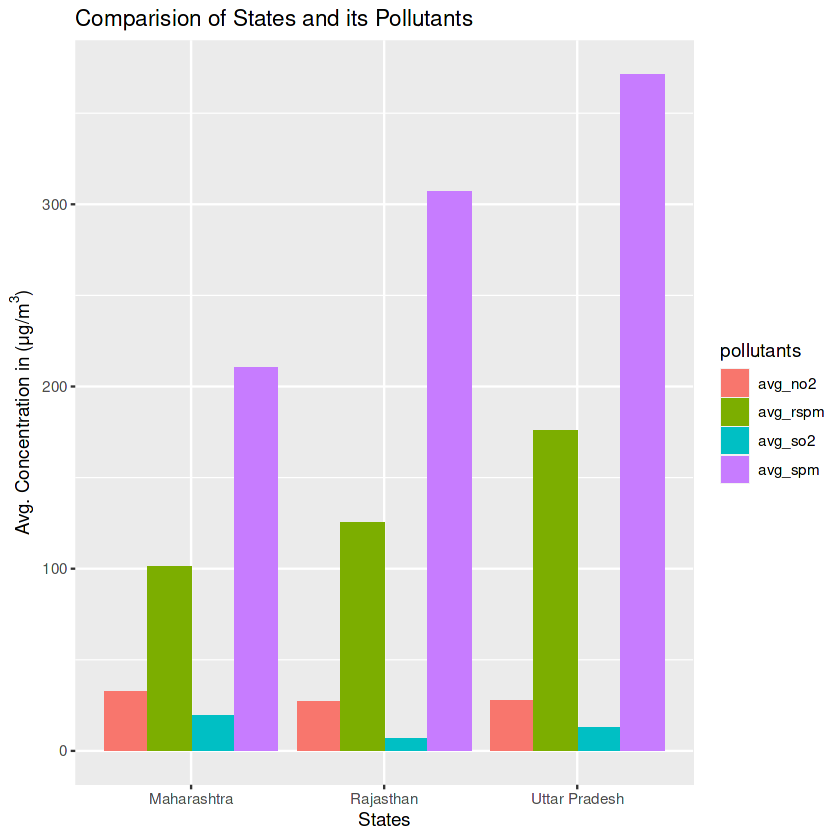

In [43]:
#calculating state avg 
state_avg <- data_sampled %>% 
  group_by(state) %>% 
  summarise(avg_so2 = mean(so2), avg_no2 = mean(no2), avg_rspm = mean(rspm), avg_spm = mean(spm))

#converting dataset wide to long
state_avg_long <- state_avg %>% 
  pivot_longer(cols = c(avg_so2, avg_no2, avg_rspm, avg_spm), names_to = "pollutants", values_to = "avg_conc")

#plotting Comparision of States and its Pollutants
ggplot(data = state_avg_long, aes(x = state , y = avg_conc, fill = pollutants)) + geom_col(position = position_dodge()) + 
  labs(x = "States" , y = expression(paste("Avg. Concentration in" , " (\u03bcg/m"^"3",")")), title = "Comparision of States and its Pollutants")

**Trends of SO2, NO2, RSPM AND SPM pollutants in three states from 2003 to 2010**

In [44]:
#Creating data frame with values of pollutants and their yearly avg.
# FOR SO2
df_meanso2 <- data_sampled %>% 
  group_by(state, year) %>% 
  summarise(avg_so2 = mean(so2))

# FOR NO2
df_meanno2 <- data_sampled %>% 
  group_by(state, year) %>% 
  summarise(avg_no2 = mean(no2))

# FOR RSPM
df_meanrspm <- data_sampled %>% 
  group_by(state, year) %>% 
  summarise(avg_rspm = mean(rspm))

# FOR SPM
df_meanspm <- data_sampled %>% 
  group_by(state, year) %>% 
  summarise(avg_spm = mean(spm))

#Using join function to create the main table 
mean_table <- inner_join(df_meanso2, df_meanno2, by = c("state", "year")) %>% 
  inner_join(df_meanrspm, by = c("state", "year")) %>% 
  inner_join(df_meanspm, by = c("state", "year"))

#for the trends of pollutants over time
meanofpollutants_per_year <- mean_table %>% 
  group_by(year) %>% 
  summarise(total_avg_so2 = mean(avg_so2), total_avg_no2 = mean(avg_no2), total_avg_rspm = mean(avg_rspm), total_avg_spm = mean(avg_spm))

`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


**Sulphur Dioxide (SO2)**

SO2 is a toxic gas that is released primarily from burning fossil fuels, such as coal and oil, in industrial processes and power generation. Its emissions contribute to the formation of acid rain, which has detrimental effects on soil, water bodies, vegetation, and buildings. Acid rain can also harm aquatic ecosystems, including fish and other aquatic organisms.

SO2 can cause respiratory problems, such as coughing, wheezing, and shortness of breath, especially in individuals with pre-existing respiratory conditions like asthma. It can also worsen existing heart and lung conditions.


**1.  	SO2 trend from 2004 to 2010**

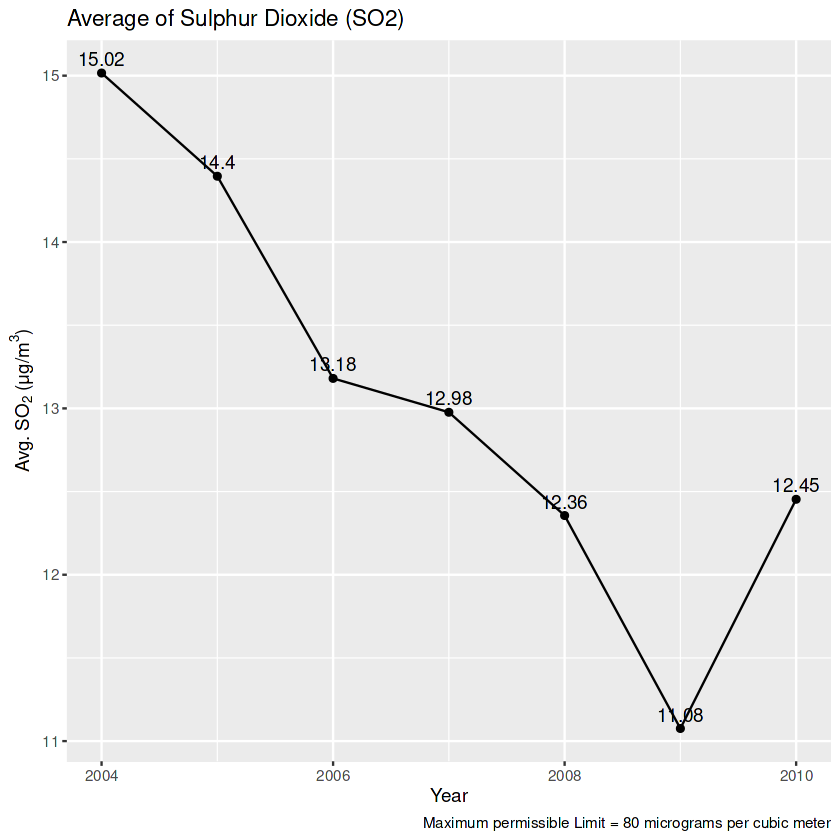

In [45]:
# Plotting Average of Sulphur Dioxide (SO2)
ggplot(meanofpollutants_per_year,
       aes(x = year, y = total_avg_so2)) + geom_line() + geom_point()+ geom_text(aes(label = round(total_avg_so2, 2)), vjust = -0.5) +
  labs(x = "Year", y = expression(paste("Avg. SO"[2], " (\u03bcg/m"^"3",")")), title = "Average of Sulphur Dioxide (SO2)", caption = "Maximum permissible Limit = 80 micrograms per cubic meter")

**2.	SO2 states wise trend from 2004 to 2010**

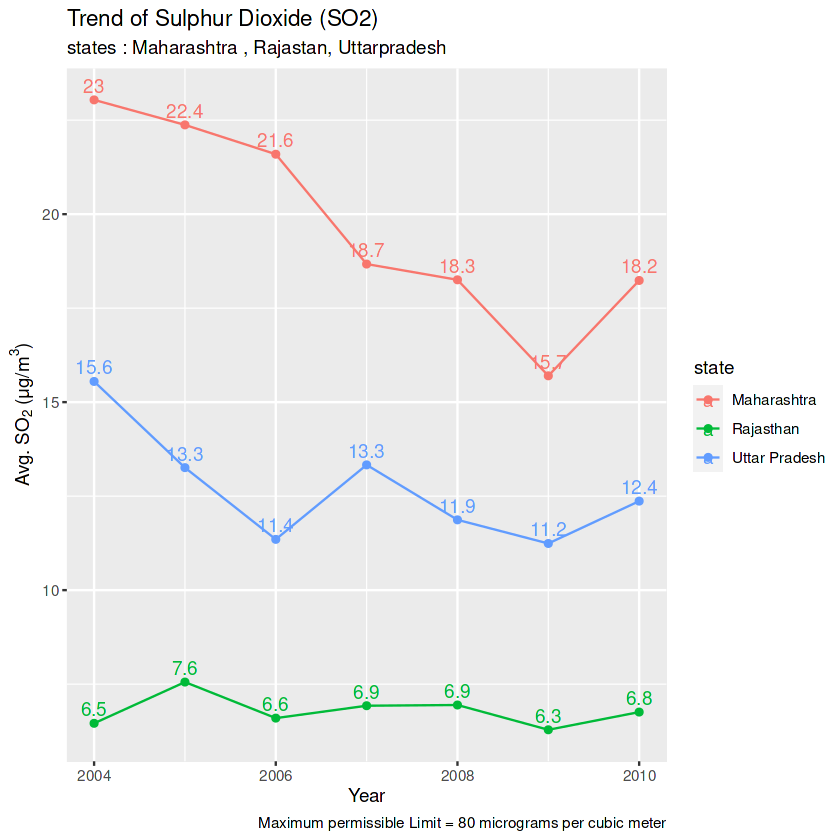

In [46]:
# Trend of Sulphur Dioxide (SO2) for each state

ggplot(mean_table, 
       aes(x = year, y = avg_so2, color = state)) + geom_text(aes(label = round(avg_so2, 1)), vjust = -0.5) +
  geom_line(size = 0.5) + geom_point() +
  labs(x = "Year", y = expression(paste("Avg. SO"[2], " (\u03bcg/m"^"3",")")), title = "Trend of Sulphur Dioxide (SO2)", subtitle = "states : Maharashtra , Rajastan, Uttarpradesh", caption = "Maximum permissible Limit = 80 micrograms per cubic meter")

**Nitrogen Dioxide (NO2)**

NO2 is a toxic gas that is primarily emitted from burning fossil fuels in vehicles, power plants, and industrial processes. It contributes to the formation of ground-level ozone (smog), which can have negative impacts on air quality and human health. Ground-level ozone can cause respiratory problems, eye irritation, and damage to vegetation and crops.

NO2 can also react with other pollutants in the atmosphere to form fine particulate matter (PM2.5), which can penetrate deep into the lungs and cause respiratory and cardiovascular issues.


**1.	NO2 trend from 2004 to 2010**

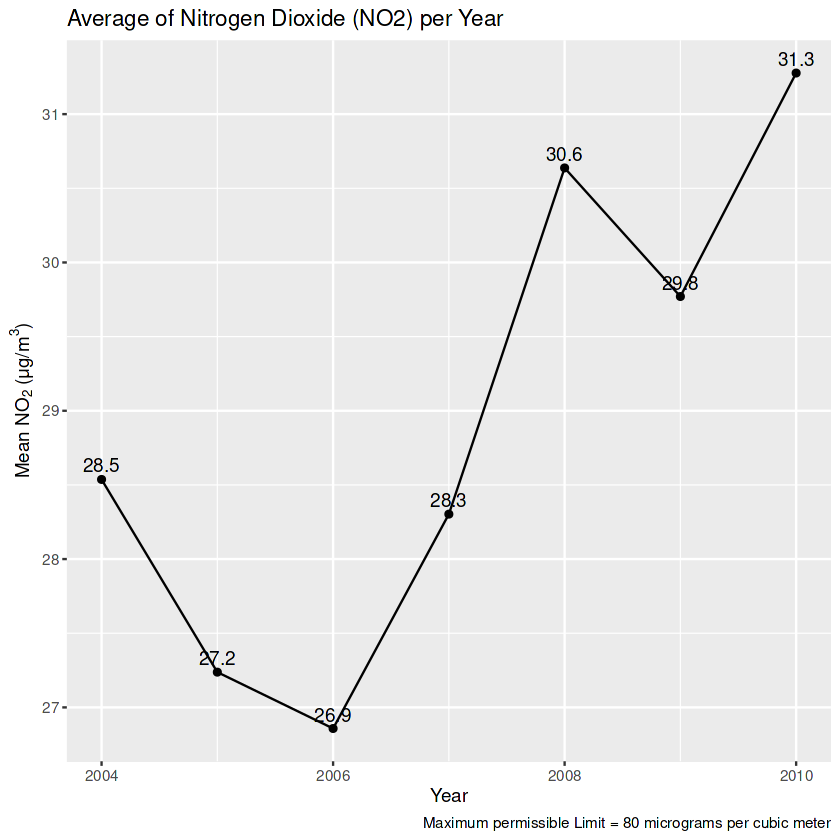

In [47]:
# Plotting Average of Nitrogen Dioxide (NO2) per Year
ggplot(meanofpollutants_per_year,
       aes(x = year, y = total_avg_no2)) + geom_line() + geom_point()+ geom_text(aes(label = round(total_avg_no2, 1)), vjust = -0.5) +
  labs(x = "Year", y = expression(paste("Mean NO"[2], " (\u03bcg/m"^"3",")")), title = "Average of Nitrogen Dioxide (NO2) per Year", caption = "Maximum permissible Limit = 80 micrograms per cubic meter")

**2.	NO2 states wise trend from 2004 to 2010**

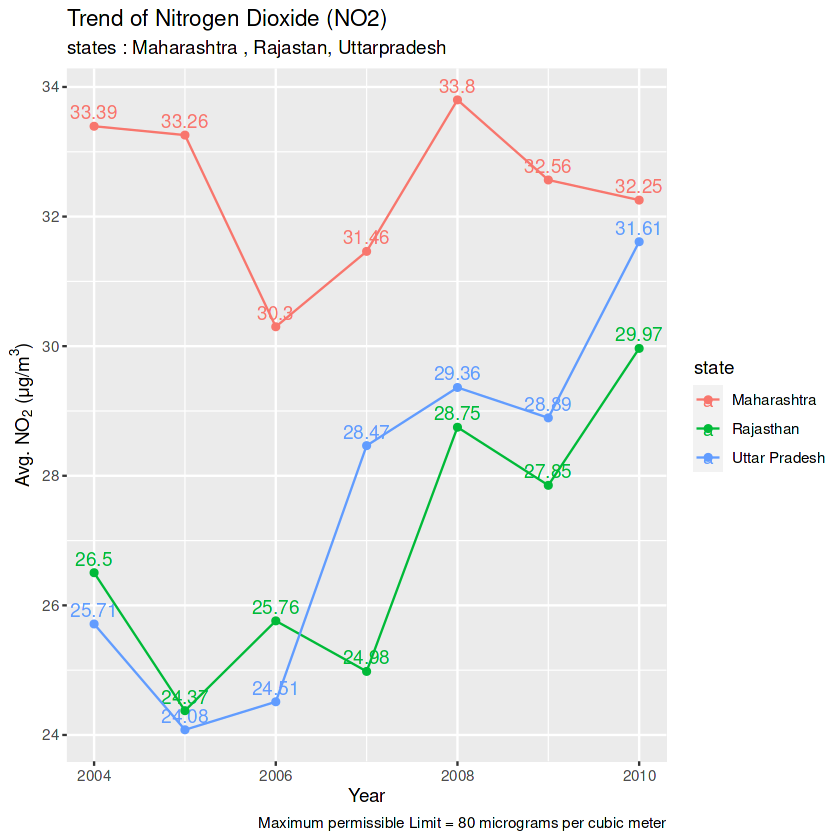

In [48]:
# Plotting Trend of Nitrogen Dioxide (NO2) for each state

ggplot(mean_table, 
       aes(x = year, y = avg_no2, color = state)) + geom_text(aes(label = round(avg_no2, 2)), vjust = -0.5) +
  geom_line(size = 0.5) + geom_point() +
  labs(x = "Year", y = expression(paste("Avg. NO"[2], " (\u03bcg/m"^"3",")")), title = "Trend of Nitrogen Dioxide (NO2)", subtitle = "states : Maharashtra , Rajastan, Uttarpradesh", caption = "Maximum permissible Limit = 80 micrograms per cubic meter") 

**Respirable Suspended Particulate Matter (RSPM)**

RSPM refers to tiny solid particles suspended in the air, which are small enough to be inhaled into the lungs. It includes particles with a diameter of 10 microns or less (PM10), which can come from sources like vehicle emissions, construction dust, and industrial emissions. 

PM10 can have adverse effects on respiratory health, causing respiratory symptoms like coughing, sneezing, and shortness of breath. Long-term exposure to PM10 has been linked to chronic respiratory conditions, cardiovascular problems, and even premature death.


**1.	RSPM  trend from 2004 to 2010**

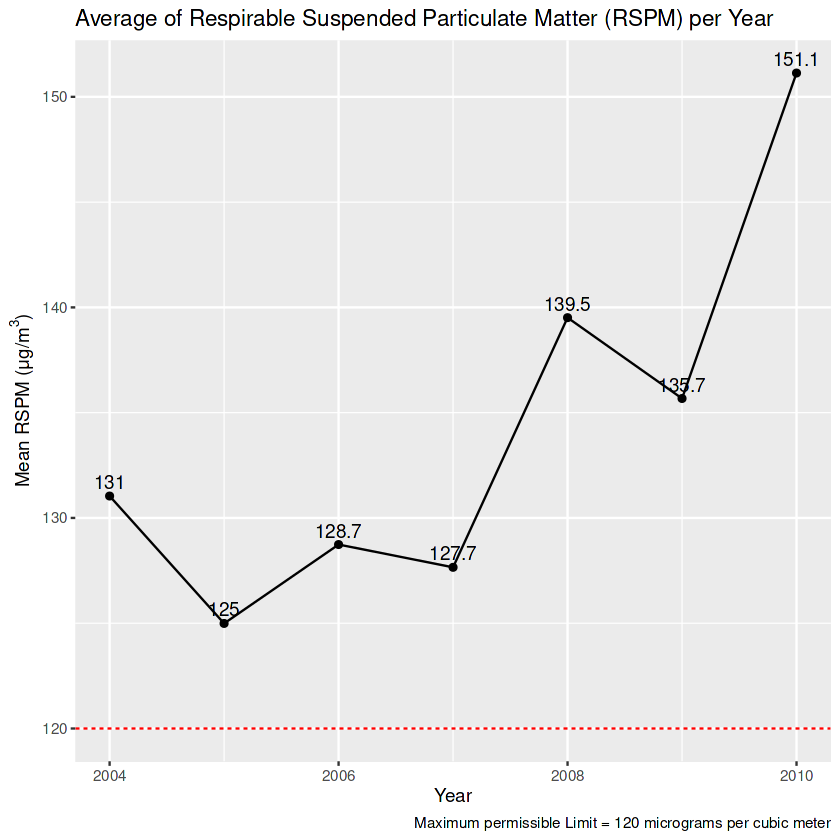

In [49]:
# Plotting Average of RSPM per Year
ggplot(meanofpollutants_per_year,
       aes(x = year, y = total_avg_rspm)) + geom_line() + geom_point()+ geom_text(aes(label = round(total_avg_rspm, 1)), vjust = -0.5) +
  labs(x = "Year", y = expression(paste("Mean RSPM", " (\u03bcg/m"^"3",")")), title = "Average of Respirable Suspended Particulate Matter (RSPM) per Year", caption = "Maximum permissible Limit = 120 micrograms per cubic meter") + 
  geom_hline(yintercept = 120, linetype = "dashed", color = "red")

**2.	RSPM states wise trend from 2004 to 2010**

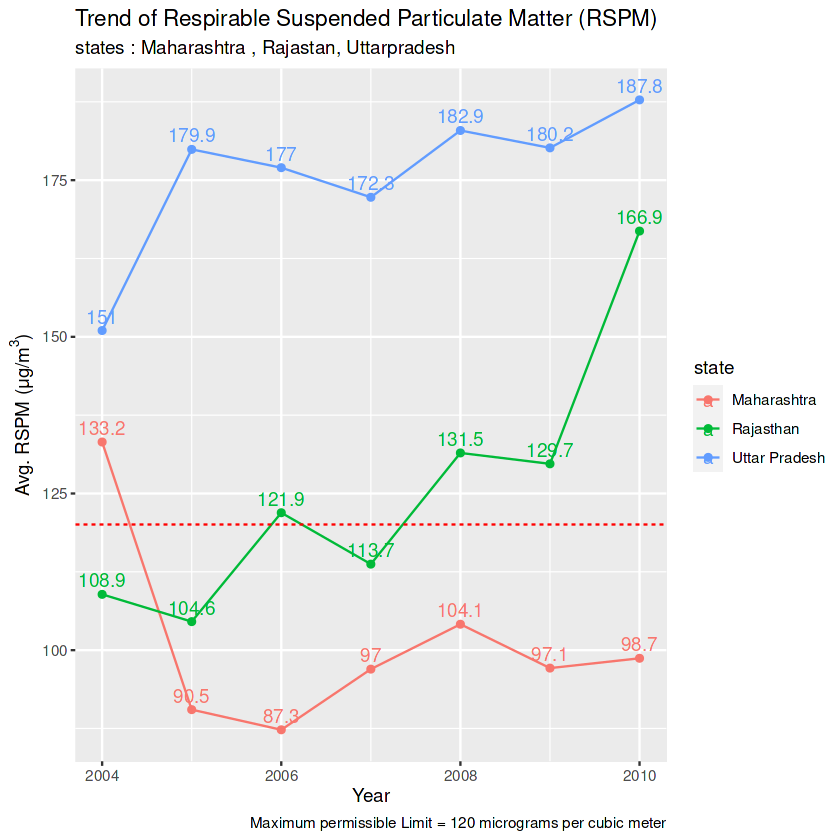

In [50]:
# Plotting Trend of RSPM for each state
ggplot(mean_table, 
       aes(x = year, y = avg_rspm, color = state)) + geom_text(aes(label = round(avg_rspm, 1)), vjust = -0.5) +
  geom_line(size = 0.5) + geom_point() +
  labs(x = "Year", y = expression(paste("Avg. RSPM", " (\u03bcg/m"^"3",")")), title = "Trend of Respirable Suspended Particulate Matter (RSPM)", subtitle = "states : Maharashtra , Rajastan, Uttarpradesh", caption = "Maximum permissible Limit = 120 micrograms per cubic meter") + 
  geom_hline(yintercept = 120, linetype = "dashed", color = "red")

**Suspended Particulate Matter (SPM)**

SPM refers to solid particles suspended in the air, including both PM10 and larger particles. It can come from various sources, such as construction and demolition activities, burning of biomass and waste, and industrial processes.

SPM can have detrimental effects on air quality, visibility, and human health. It can cause respiratory problems, eye and throat irritation, and damage to vegetation, buildings, and infrastructure.


**1.	SPM trend from 2004 to 2010**

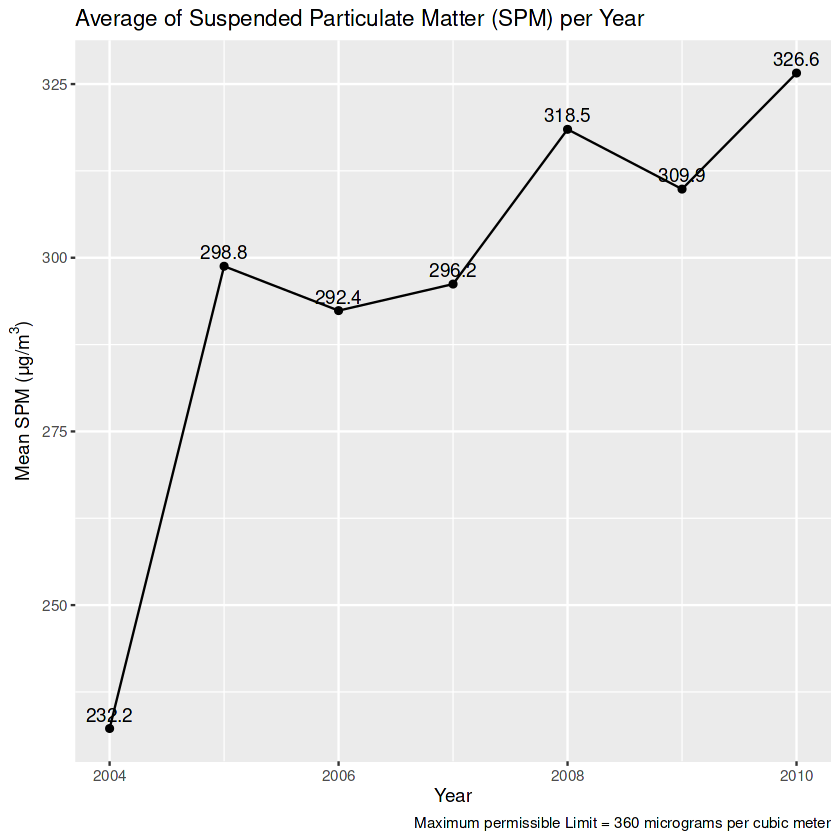

In [51]:
# Plotting SPM trend per year
ggplot(meanofpollutants_per_year,
       aes(x = year, y = total_avg_spm)) + geom_line() + geom_point()+ geom_text(aes(label = round(total_avg_spm, 1)), vjust = -0.5) +
  labs(x = "Year", y = expression(paste("Mean SPM", " (\u03bcg/m"^"3",")")), title = "Average of Suspended Particulate Matter (SPM) per Year", caption = "Maximum permissible Limit = 360 micrograms per cubic meter")

**2.	SPM states wise trend from 2004 to 2010**

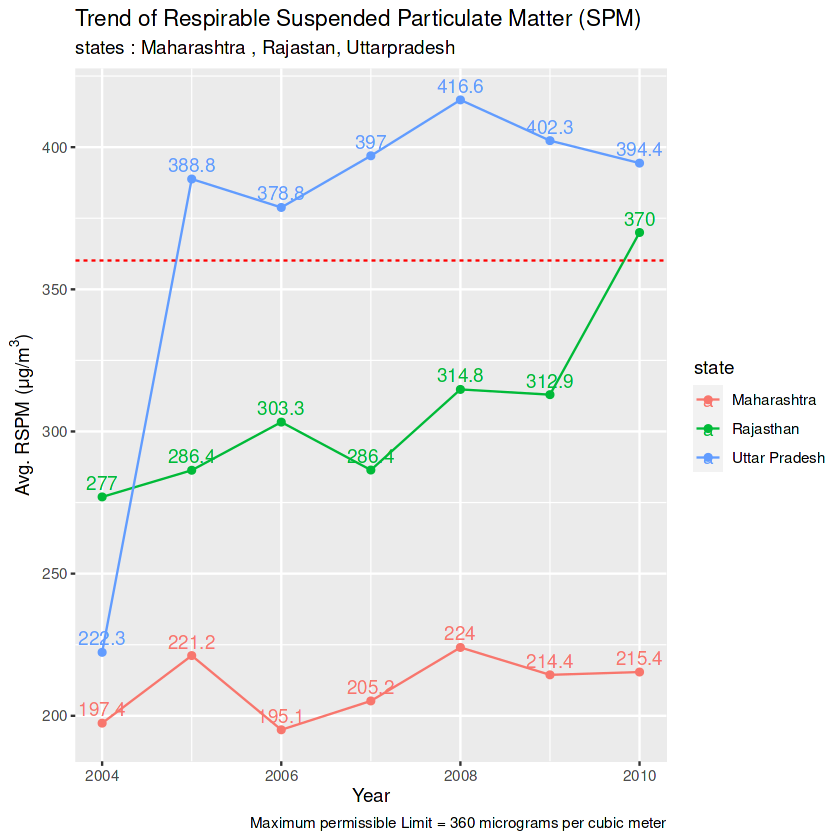

In [52]:
# Plotting SPM trend for each state
ggplot(mean_table, 
       aes(x = year, y = avg_spm, color = state)) + geom_text(aes(label = round(avg_spm, 1)), vjust = -0.5) +
  geom_line(size = 0.5) + geom_point() + 
  labs(x = "Year", y = expression(paste("Avg. RSPM", " (\u03bcg/m"^"3",")")), title = "Trend of Respirable Suspended Particulate Matter (SPM)", subtitle = "states : Maharashtra , Rajastan, Uttarpradesh", caption = "Maximum permissible Limit = 360 micrograms per cubic meter")+ 
  geom_hline(yintercept = 360, linetype = "dashed", color = "red")

# **Findings and Conclusion**

Based on the data analysed it is evident that Uttar Pradesh has the highest pollution levels among selected states, while Maharashtra has the lowest pollution levels.

From 2004 to 2010, Maharashtra has the highest concentration of SO2 over the period. Although, there has been a decrease in the concentration of SO2, primarily attributed to the reduced concentrations in Maharashtra and Uttar Pradesh. However, Rajasthan has not shown any significant change in SO2 concentrations during this period.

On the other hand, the concentration of NO2 has exhibited an exponential increase from 2006 to 2009, despite an overall upward trend across all states. Notably, Maharashtra has shown a decrease in NO2 concentrations.

Similarly, the concentration of RSPM has shown an overall increase over the years, but Maharashtra has demonstrated a decrease in RSPM concentrations, the Lowest being in 2006. Whereas the highest concertation was seen in 2010.

There has been an abrupt change in the concentration of SPM in 2004-2005, primarily driven by Uttar Pradesh, with all other states showing an increase in SPM concentrations, except Maharashtra. Year 2008 recorded the highest values of SPM. Uttar Pradesh being highest and the Maharashtra being lowest.


Further Analysis 

These trends of pollutants should be co-related with specific policies and their implementation by their respective state government. 


**If you have any thoughts or recommendations, please feel free to share them with me.**

